# Outbreaks

Exploratory stuff to figure out how best to define "outbreak"


In [1]:
# init

from matplotlib import pyplot
import numpy as np
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns

from covid19stats import *

conn = get_db_conn()

sns.set(style="darkgrid")

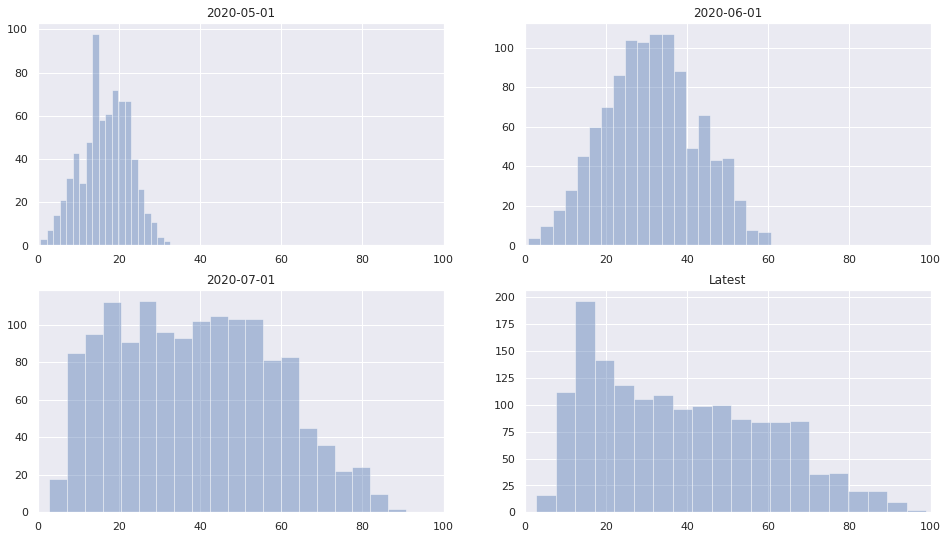

In [2]:
sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-05-01'
    and Confirmed >= 100;
"""

df_may = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-06-01'
    and Confirmed >= 100;
"""

df_jun = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-07-01'
    and Confirmed >= 100;
"""

df_jul = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE
    date = (select max(date) from fact_counties_progress)
    and Confirmed >= 100;
"""

df_latest = psql.read_sql(sql, conn)

fig, ax = pyplot.subplots(2, 2, figsize=[16, 9])

s = sns.distplot(df_may, bins=20, ax=ax[0][0], kde=False)
s.set_title('2020-05-01')
s.set(xlim=(0,100))

s = sns.distplot(df_jun, bins=20, ax=ax[0][1], kde=False)
s.set_title('2020-06-01')
s.set(xlim=(0,100))

s = sns.distplot(df_jul, bins=20, ax=ax[1][0], kde=False)
s.set_title('2020-07-01')
s.set(xlim=(0,100))

s = sns.distplot(df_latest, bins=20, ax=ax[1][1], kde=False)
s.set_title('Latest')
s.set(xlim=(0,100));